In [65]:
import networkx as nx
import os
import networkx as nx
from node2vec import Node2Vec
from helper_functions import read_net
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd

In [45]:
filename = "wikilinks_ids"
folder = os.path.join("..", "data")

In [46]:
G = read_net(folder, filename)

In [49]:
pr = nx.pagerank(G, alpha=0.9)

In [143]:
sizes = np.array(list(pr.values()))

In [144]:
colors = np.array(list(pr.values()))

In [145]:
h = 50
l = 0

In [146]:
sizes = (sizes - min(sizes)) / (max(sizes) - min(sizes)) * (h - l) + l

In [147]:
sizes = sizes**2

In [128]:
count = 0
for i in sizes:
    if i > 0:
        count += 1

In [66]:
EMBEDDING_FILENAME = os.path.join("..", "data", "wikilinks.emb")

In [67]:
embeddings = np.genfromtxt(EMBEDDING_FILENAME, delimiter=',')

In [70]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeddings)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

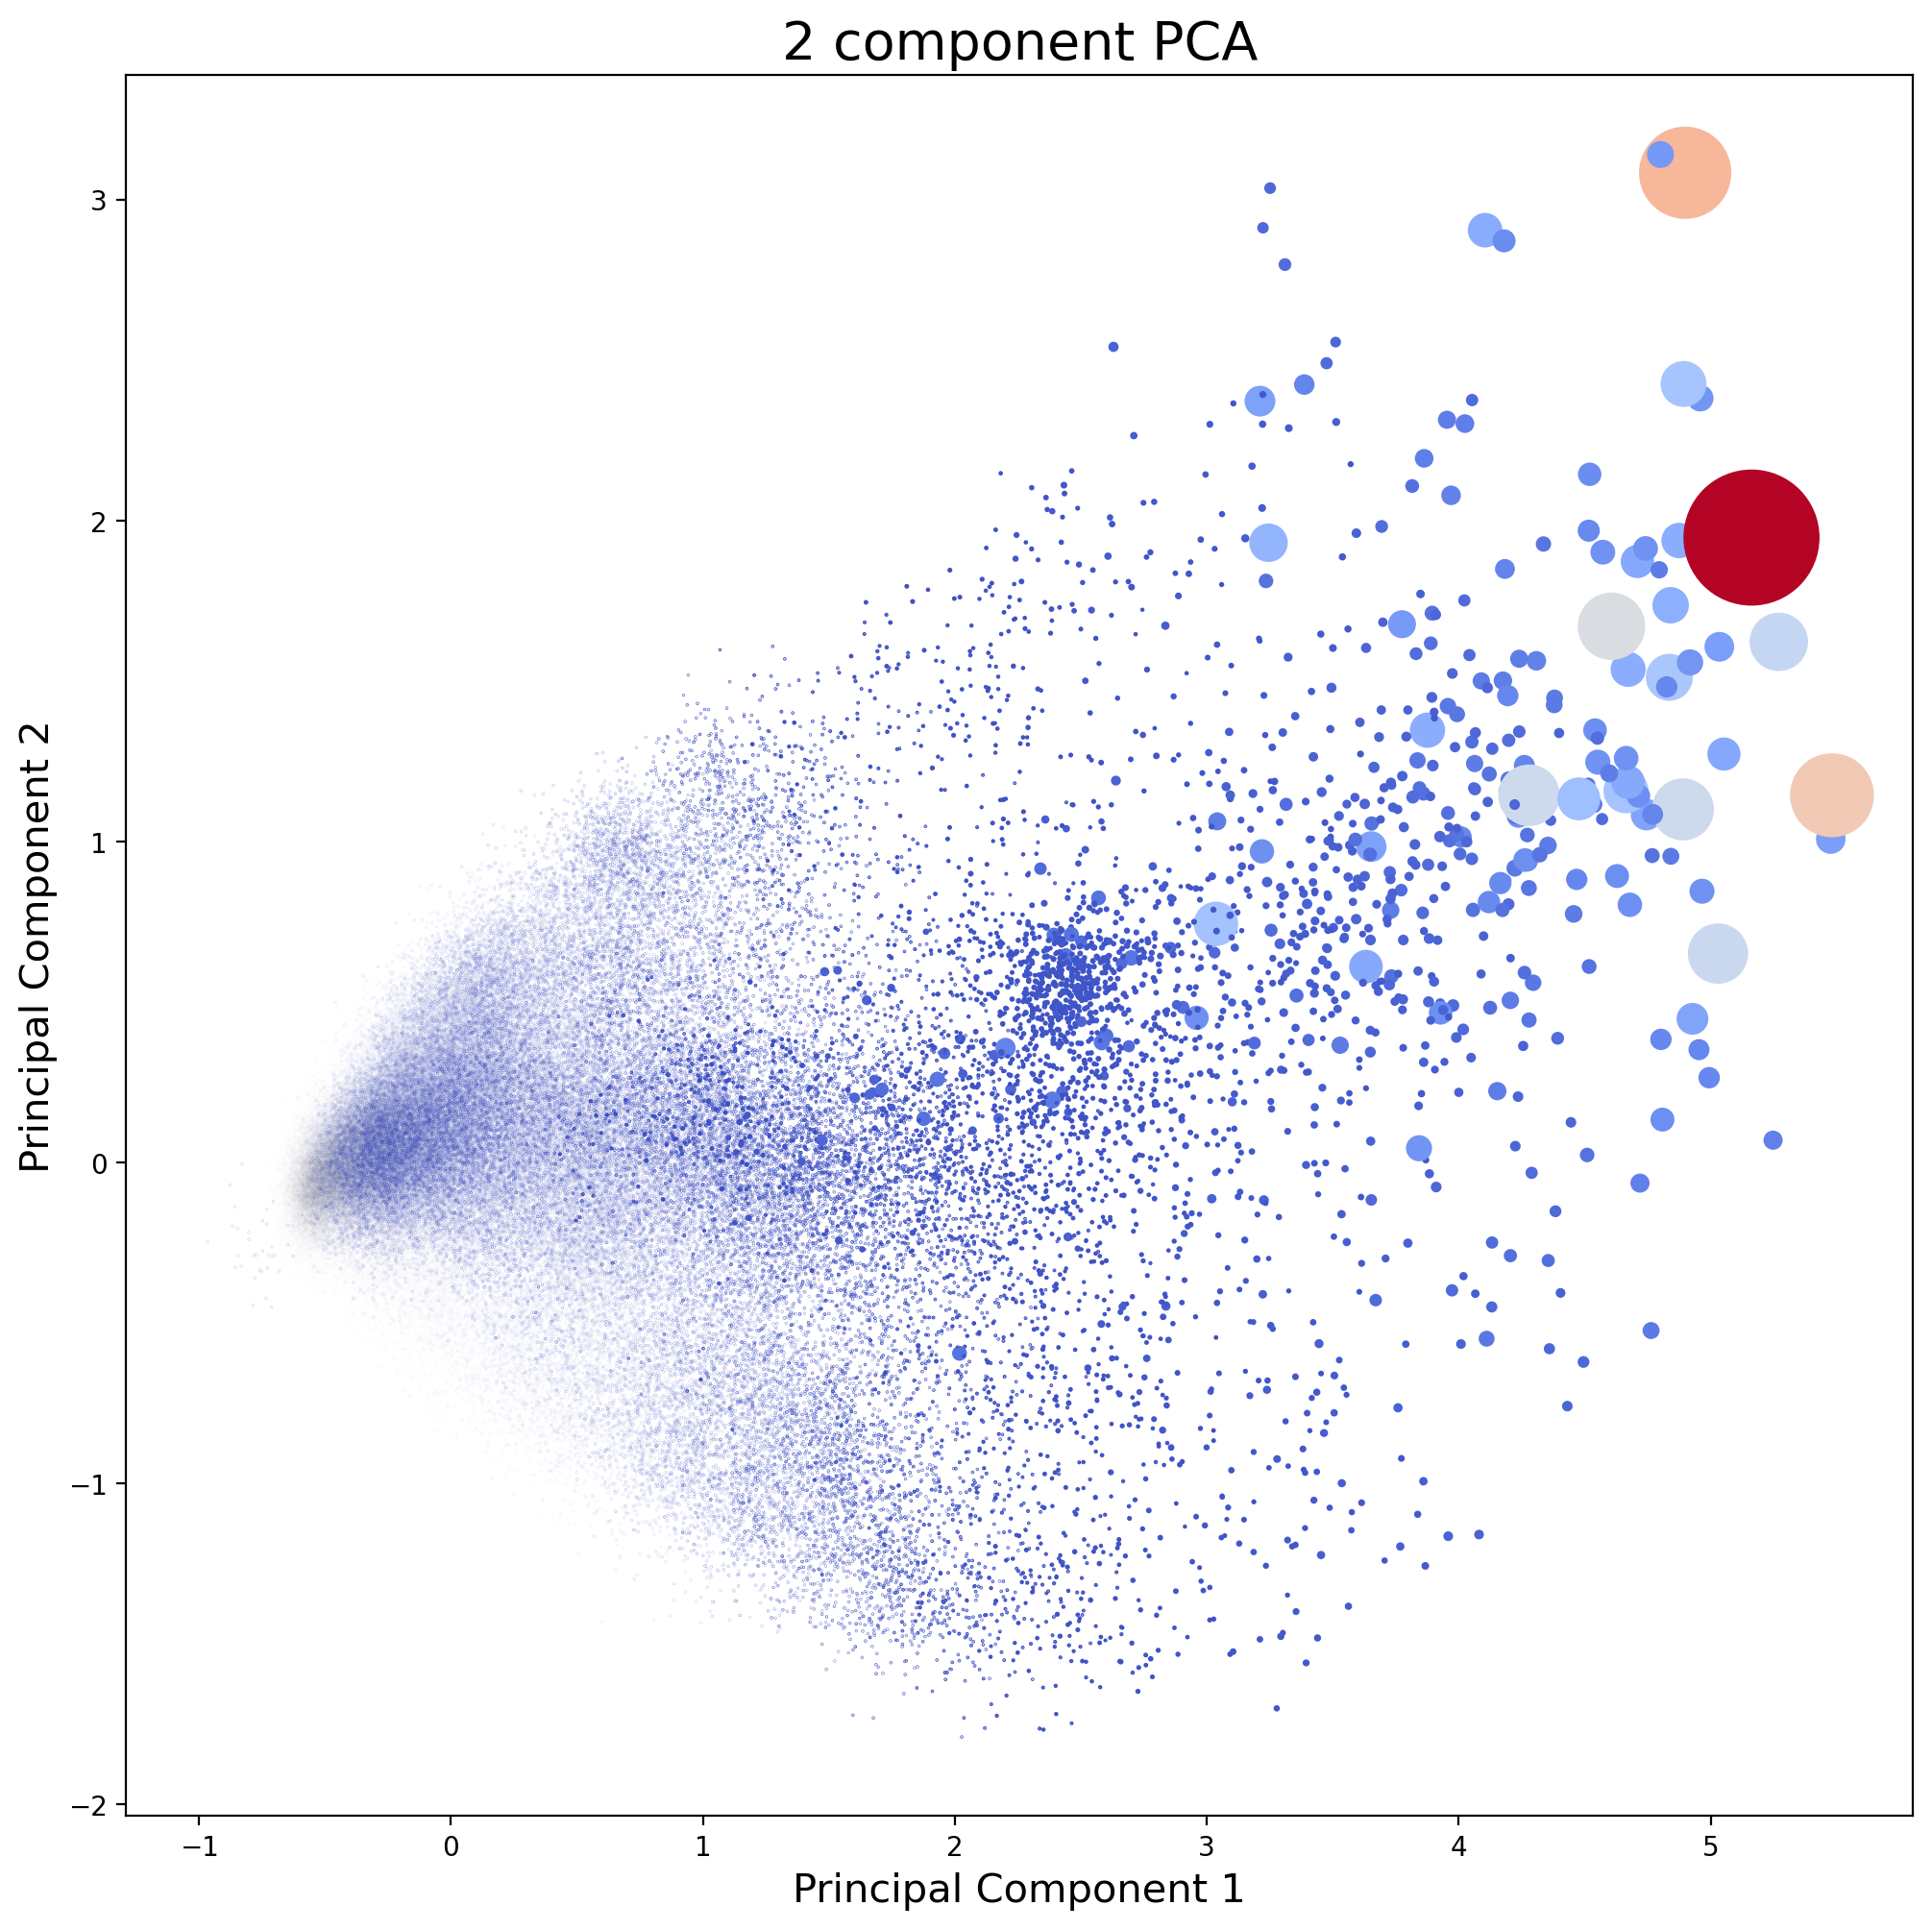

In [153]:
fig = plt.figure(figsize = (12,12), facecolor="white", dpi=200)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], s=sizes, c=colors, cmap=plt.cm.coolwarm)
plt.savefig("../img/pca.png", bbox_inches="tight", dpi=200)

In [154]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(embeddings)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

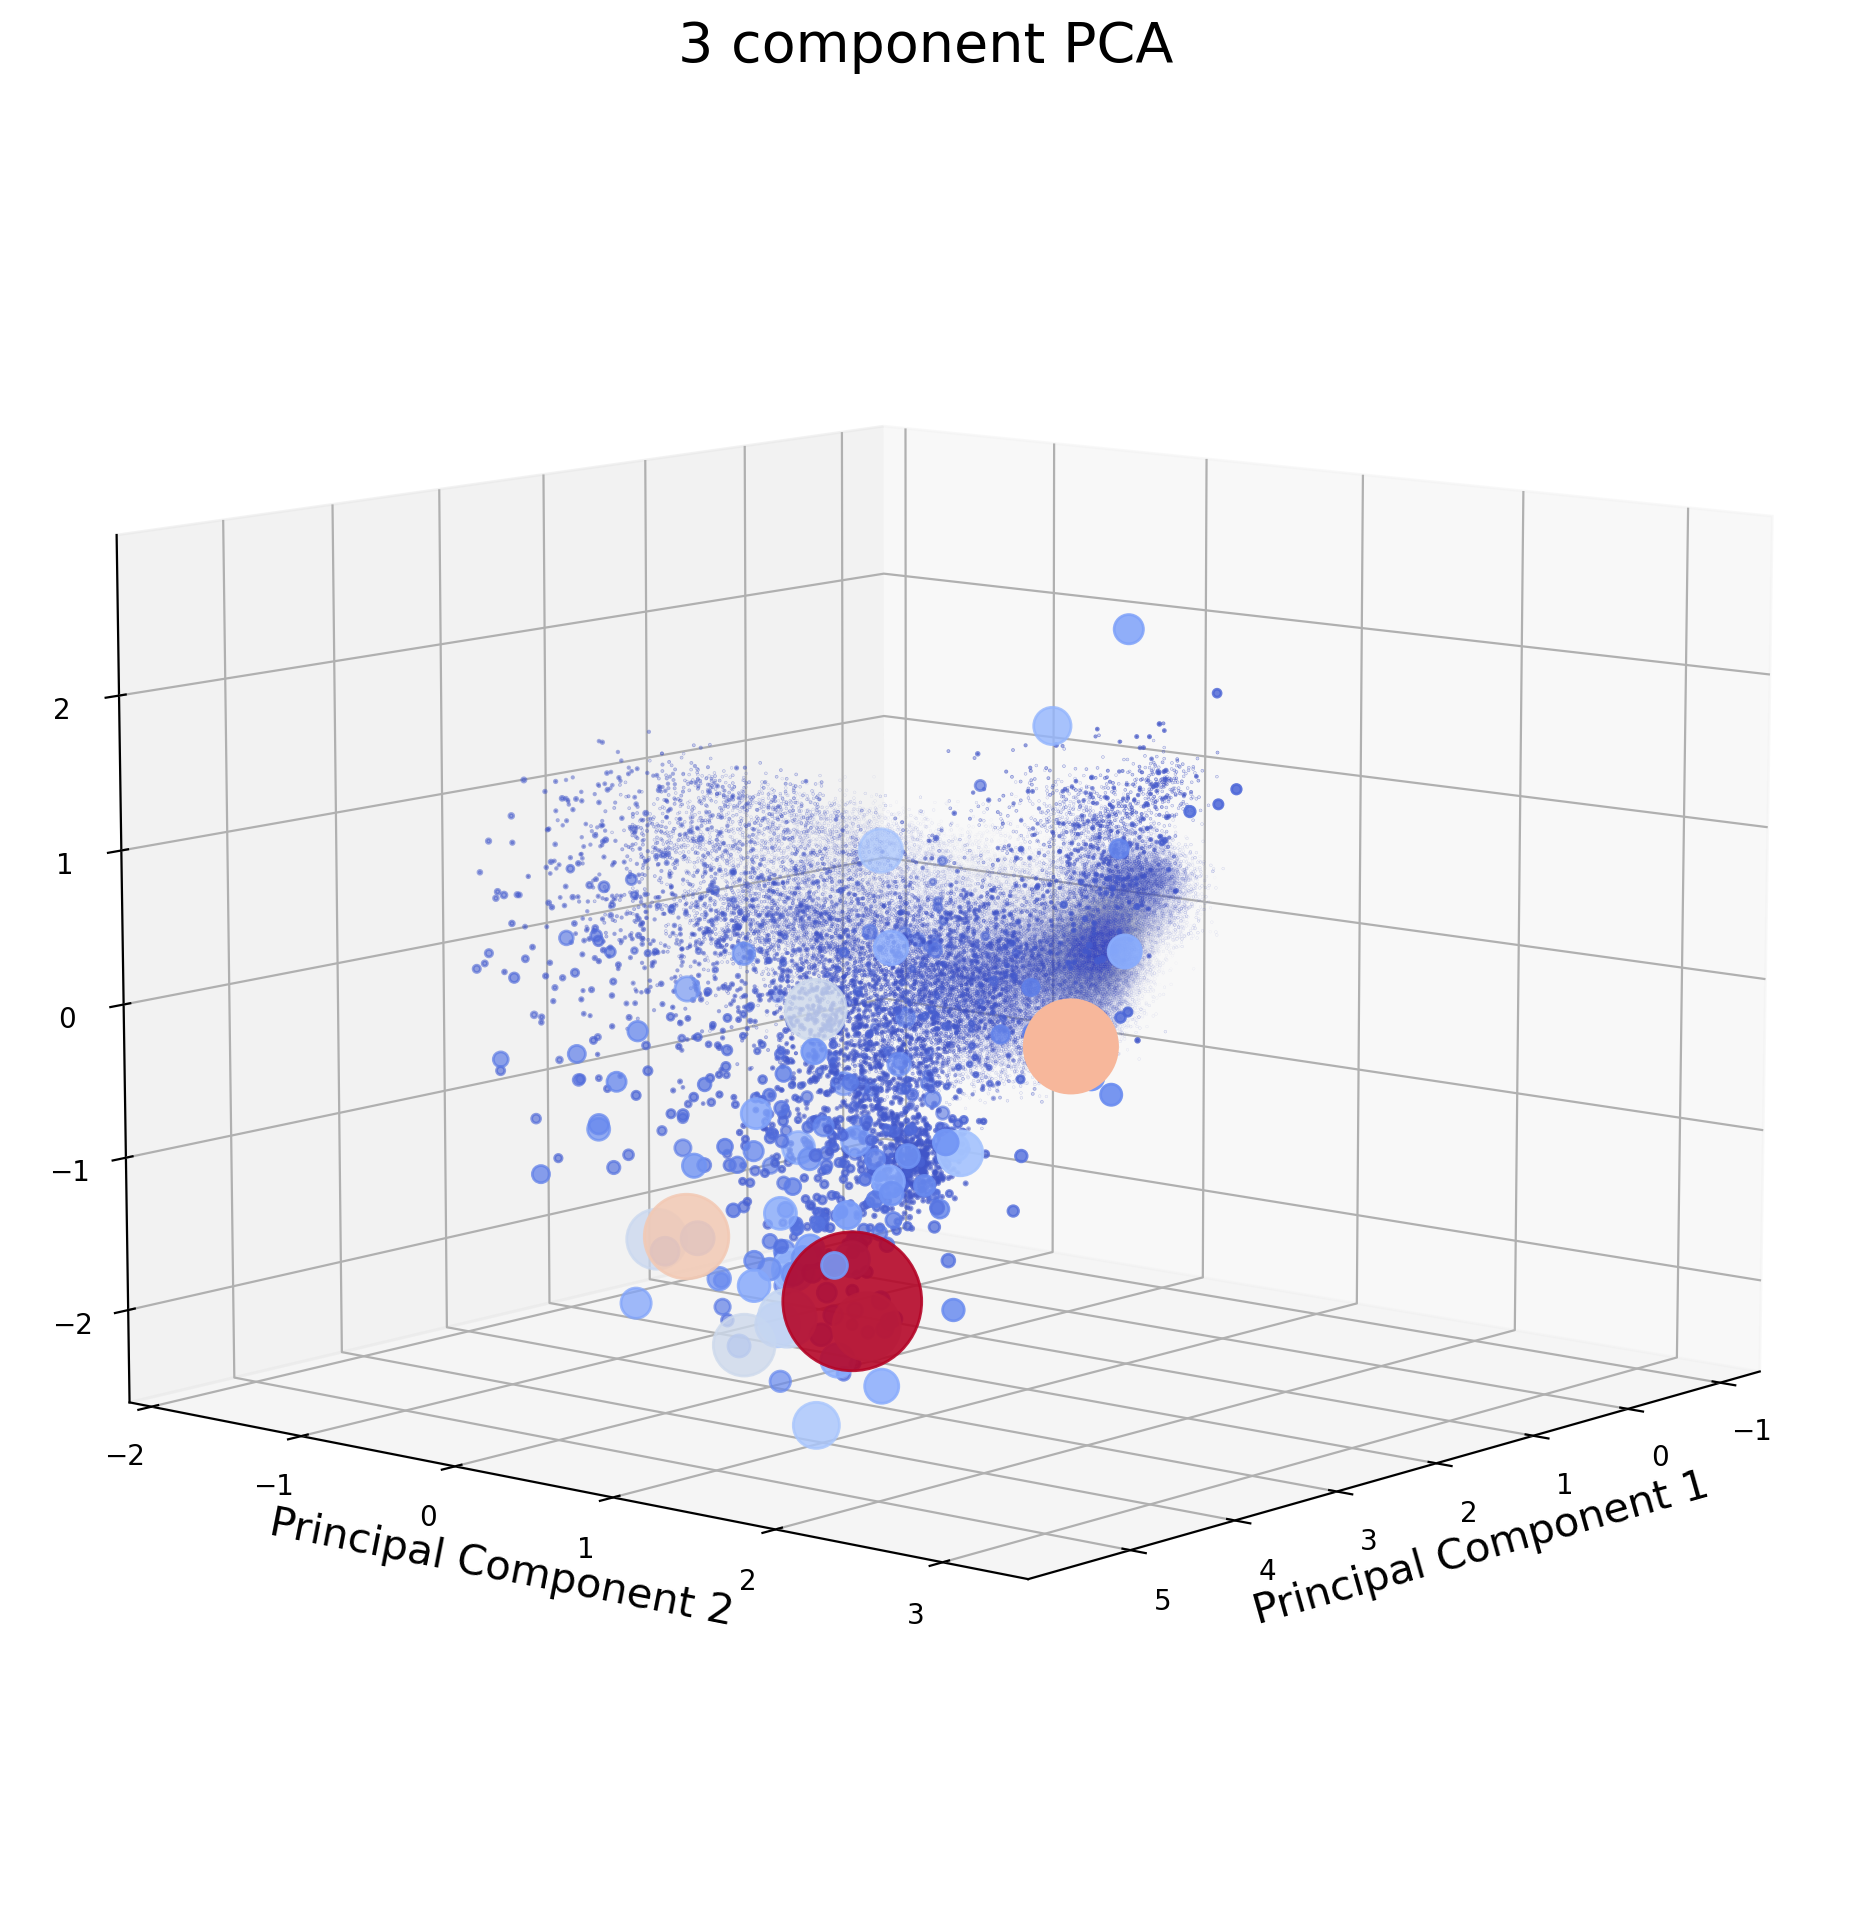

In [166]:
fig = plt.figure(figsize = (12,12), facecolor='white', dpi=200)
ax = fig.add_subplot(projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], principalDf['principal component 3'], s=sizes, c=colors, cmap=plt.cm.coolwarm)
ax.view_init(10, 40)
plt.savefig("../img/pca3d.png", bbox_inches="tight", dpi=200)